<a href="https://colab.research.google.com/github/GIGAParviz/Fashion-MNist-Predict/blob/main/Fashion_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import tensorflow as tf
from tensorflow import keras
import numpy as np


In [2]:
o = keras.datasets.fashion_mnist
(x_train , y_train) , (x_test , y_test) = o.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
y_train.shape

(60000,)

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
import matplotlib.pyplot as plt

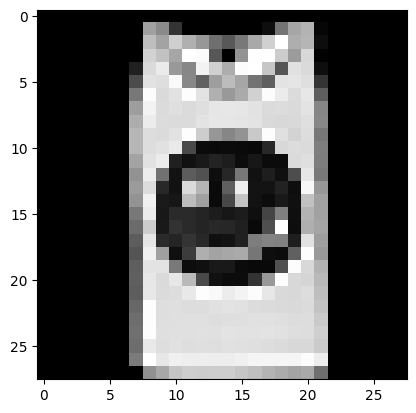

In [6]:
plt.imshow(x_train[101] , cmap='gray');

In [7]:
x_train , x_test = x_train/255 , x_test/255

In [8]:
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
init = keras.initializers.GlorotNormal()

In [11]:
value = init(shape=(2,2))
value

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[-1.4861248 , -0.70419854],
       [ 1.3302121 , -1.2069757 ]], dtype=float32)>

In [12]:
model = keras.models.Sequential([
  keras.layers.Flatten(input_shape =[28 ,28]),
  keras.layers.Dense(150 , activation = "relu" , kernel_initializer='he_normal'),
  keras.layers.Dense(100 , activation = "relu"),
  keras.layers.Dropout(0.2),
  keras.layers.Dense(100 , activation = "relu"),
  keras.layers.Dense(75 , activation = "relu"),
  keras.layers.Dropout(0.2),
  keras.layers.Dense(10 , activation = "softmax")
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 150)               117750    
                                                                 
 dense_1 (Dense)             (None, 100)               15100     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 75)                7575      
                                                                 
 dropout_1 (Dropout)         (None, 75)                0

In [14]:
weight , bias = model.layers[1].get_weights()
bias

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [15]:
model.compile(
              loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"]
              )

In [16]:
model

**Fit Mode**




In [17]:
history = model.fit(x_train , y_train , epochs=50 , validation_split = 0.15)

Epoch 1/50
1594/1594 [==============================] - 20s 8ms/step - loss: 1.0206 - accuracy: 0.6323 - val_loss: 0.5808 - val_accuracy: 0.7861
Epoch 2/50
1594/1594 [==============================] - 9s 5ms/step - loss: 0.6030 - accuracy: 0.7873 - val_loss: 0.4901 - val_accuracy: 0.8260
Epoch 3/50
1594/1594 [==============================] - 6s 4ms/step - loss: 0.5181 - accuracy: 0.8191 - val_loss: 0.4447 - val_accuracy: 0.8378
Epoch 4/50
1594/1594 [==============================] - 7s 4ms/step - loss: 0.4738 - accuracy: 0.8345 - val_loss: 0.4222 - val_accuracy: 0.8456
Epoch 5/50
1594/1594 [==============================] - 6s 4ms/step - loss: 0.4444 - accuracy: 0.8440 - val_loss: 0.4056 - val_accuracy: 0.8521
Epoch 6/50
1594/1594 [==============================] - 7s 4ms/step - loss: 0.4251 - accuracy: 0.8493 - val_loss: 0.3892 - val_accuracy: 0.8622
Epoch 7/50
1594/1594 [==============================] - 6s 4ms/step - loss: 0.4096 - accuracy: 0.8553 - val_loss: 0.3834 - val_accuracy

In [18]:
print(history.history)

{'loss': [1.0205671787261963, 0.602977991104126, 0.5181427597999573, 0.47376835346221924, 0.44441068172454834, 0.4251454770565033, 0.40964823961257935, 0.39385831356048584, 0.38028186559677124, 0.3726969063282013, 0.3624339699745178, 0.3554420471191406, 0.3491685092449188, 0.3397327661514282, 0.33501988649368286, 0.3287369906902313, 0.32271820306777954, 0.31573939323425293, 0.312205046415329, 0.30341431498527527, 0.3018900454044342, 0.2950599193572998, 0.2922747731208801, 0.28543829917907715, 0.2833462953567505, 0.2810547351837158, 0.2766936719417572, 0.2714793086051941, 0.26768195629119873, 0.2670521140098572, 0.25949203968048096, 0.2565467059612274, 0.2541525065898895, 0.25158175826072693, 0.2506542503833771, 0.24275869131088257, 0.24316978454589844, 0.2404036670923233, 0.2360839694738388, 0.2346455305814743, 0.23009687662124634, 0.23105822503566742, 0.2269042432308197, 0.22325801849365234, 0.21879734098911285, 0.21921926736831665, 0.2155289649963379, 0.21406380832195282, 0.211255386

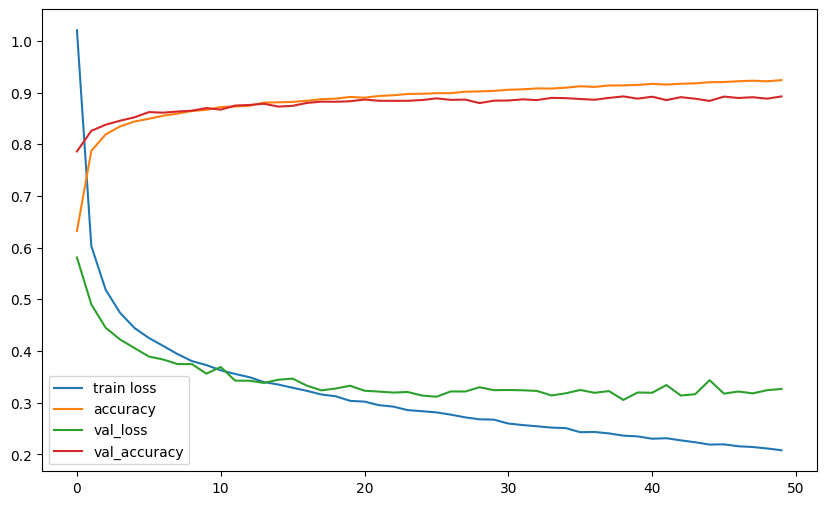

In [19]:
fig , ax = plt.subplots(figsize=(10 ,6))
ax.plot(history.history['loss'] , label= "train loss")
ax.plot(history.history['accuracy'] , label= "accuracy")
ax.plot(history.history['val_loss'] , label= "val_loss")
ax.plot(history.history['val_accuracy'] , label= "val_accuracy")
ax.legend()

In [20]:
model.evaluate(x_test , y_test , verbose=1)

313/313 [==============================] - 1s 3ms/step - loss: 0.3518 - accuracy: 0.8801


[0.35180139541625977, 0.8801000118255615]

In [21]:
nx = x_test[1:3,:,:]

nx.shape

(2, 28, 28)

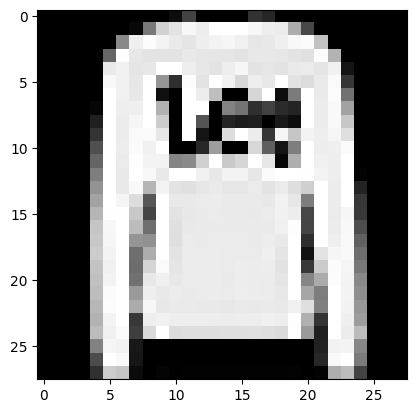

In [22]:
plt.imshow(nx[0] , cmap='gray')

In [23]:
model.predict(nx).round(3)

1/1 [==============================] - 0s 103ms/step


array([[0.   , 0.   , 0.984, 0.   , 0.007, 0.   , 0.009, 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ]], dtype=float32)

In [24]:
model_mcd = np.stack([model(x_test , training=True) for _ in range(50)])
np.round(model_mcd.mean(axis=1)[1:3] , 3)

array([[0.099, 0.098, 0.096, 0.101, 0.098, 0.097, 0.106, 0.109, 0.102,
        0.094],
       [0.099, 0.097, 0.096, 0.101, 0.099, 0.098, 0.105, 0.109, 0.102,
        0.094]], dtype=float32)

In [25]:
import numpy as np

In [26]:
np.argmax(model.predict(nx).round(3) , axis=1)

1/1 [==============================] - 0s 21ms/step


array([2, 1])

In [27]:
y_test[1:3]

array([2, 1], dtype=uint8)

In [28]:
model.save('Fasion Mnist.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [29]:
model = keras.models.Sequential([
  keras.layers.Conv2D(50 , 5 , activation='relu' , padding='same', input_shape=[28,28,1]),
  keras.layers.MaxPooling2D(2),
  keras.layers.Conv2D(100 , 3 , activation='relu' , padding='same'),
  keras.layers.MaxPooling2D(2),
  keras.layers.Conv2D(200 , 3 , activation='relu' , padding='same'),
  keras.layers.MaxPooling2D(2),
  keras.layers.Flatten(),
  keras.layers.Dense(100 , activation='relu'),
  keras.layers.Dropout(0.4),
  keras.layers.Dense(50 , activation='relu'),
  keras.layers.Dropout(0.4),
  keras.layers.Dense(10 , activation='softmax')
])

In [30]:
model.compile(
              loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"]
              )

In [35]:
h= model.fit(x_train , y_train , epochs=30 , validation_split=0.3)

Epoch 1/30
1313/1313 [==============================] - 8s 6ms/step - loss: 0.2975 - accuracy: 0.8964 - val_loss: 0.2848 - val_accuracy: 0.8991
Epoch 2/30
1313/1313 [==============================] - 7s 5ms/step - loss: 0.2886 - accuracy: 0.9003 - val_loss: 0.2771 - val_accuracy: 0.9011
Epoch 3/30
1313/1313 [==============================] - 8s 6ms/step - loss: 0.2881 - accuracy: 0.9005 - val_loss: 0.2780 - val_accuracy: 0.9013
Epoch 4/30
1313/1313 [==============================] - 9s 7ms/step - loss: 0.2842 - accuracy: 0.8992 - val_loss: 0.2717 - val_accuracy: 0.9021
Epoch 5/30
1313/1313 [==============================] - 7s 6ms/step - loss: 0.2787 - accuracy: 0.9019 - val_loss: 0.2849 - val_accuracy: 0.8983
Epoch 6/30
1313/1313 [==============================] - 8s 6ms/step - loss: 0.2762 - accuracy: 0.9025 - val_loss: 0.2728 - val_accuracy: 0.9020
Epoch 7/30
1313/1313 [==============================] - 9s 7ms/step - loss: 0.2710 - accuracy: 0.9052 - val_loss: 0.2702 - val_accuracy:

In [36]:
h.history

{'loss': [0.2974558472633362,
  0.2886368930339813,
  0.288136750459671,
  0.28418606519699097,
  0.27865666151046753,
  0.2762186527252197,
  0.2709824740886688,
  0.2617608904838562,
  0.26267915964126587,
  0.25914517045021057,
  0.2565474510192871,
  0.25158610939979553,
  0.2466166764497757,
  0.24146150052547455,
  0.24091841280460358,
  0.2348002940416336,
  0.23416662216186523,
  0.22679485380649567,
  0.22671416401863098,
  0.22505679726600647,
  0.2172926664352417,
  0.21464130282402039,
  0.2119833528995514,
  0.20891083776950836,
  0.20599812269210815,
  0.2019757181406021,
  0.2010018527507782,
  0.19524440169334412,
  0.19047963619232178,
  0.18908926844596863],
 'accuracy': [0.8963571190834045,
  0.9002857208251953,
  0.9004999995231628,
  0.8992142677307129,
  0.9018571376800537,
  0.9024761915206909,
  0.9051904678344727,
  0.9073333144187927,
  0.9071190357208252,
  0.9096428751945496,
  0.9111666679382324,
  0.9112619161605835,
  0.9135952591896057,
  0.9156190752983

In [37]:
model.evaluate(x_test , y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2858 - accuracy: 0.9062


[0.2858406603336334, 0.9061999917030334]

In [38]:
pre = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


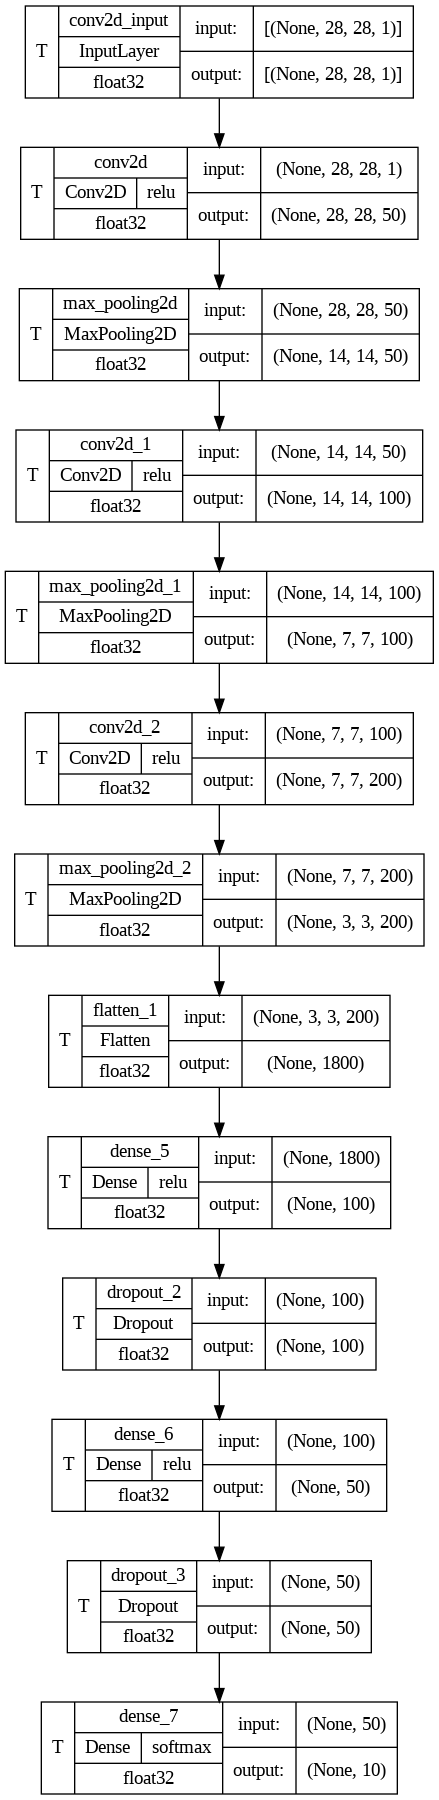

In [43]:
tf.keras.utils.plot_model(model , show_shapes=True , expand_nested=True , show_layer_activations=True, show_dtype=True , show_trainable=True)

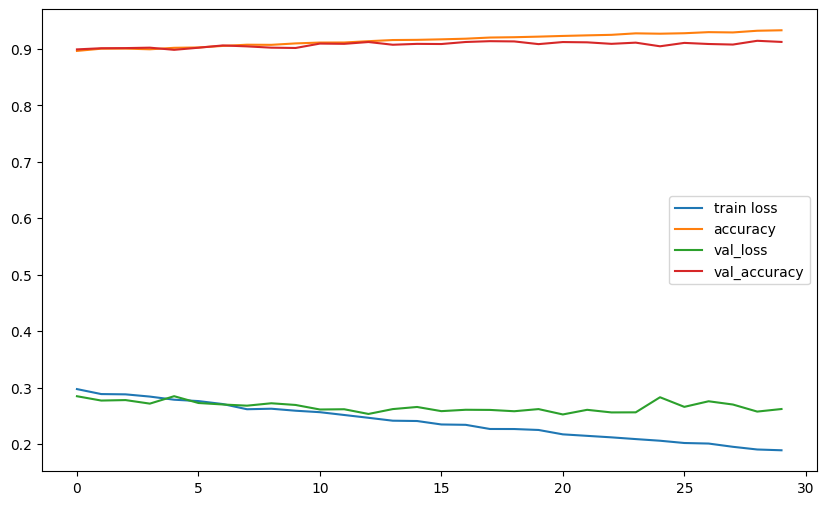

In [44]:
fig , ax = plt.subplots(figsize=(10 ,6))
ax.plot(h.history['loss'] , label= "train loss")
ax.plot(h.history['accuracy'] , label= "accuracy")
ax.plot(h.history['val_loss'] , label= "val_loss")
ax.plot(h.history['val_accuracy'] , label= "val_accuracy")
ax.legend()